# **Prerequisite -Import the required packages.**

1. For Data importing and Manipulations --> Pandas,numpy
2. For Data Visualization --> seaborn, matplotlib
3. For Natural Language Processing --> nltk
4. For modelling --> sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Importing the data from Github Repository**(Step Below)

1. Training Data
2. Testing Data

Marked the traning and testing Data with "**Identity**" to do the Data processing in one step.


In [5]:
train_data= pd.read_csv('https://raw.githubusercontent.com/Yash12100/Data_science/master/Training%20Data.csv', encoding='latin-1')
test_data= pd.read_csv('https://raw.githubusercontent.com/Yash12100/Data_science/master/Company_%20Business%20Description.csv', encoding='latin-1')
train_data['identity'] = "train"
test_data['identity'] = "test"
train_data.head(5)


,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Industry Classifications,Security Tickers,identity
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",Beauty Care Products (Primary); Consumer Stapl...,OTCPK:EEIG,train
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...","Catalog Flowers, Gifts and Novelties (Primary)...",NasdaqGS:FLWS; DB:FWC,train
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",Information Technology (Primary); Internet Sof...,OTCPK:RETC,train
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",Casualty (Primary); Financials (Primary); Fire...,NasdaqGM:PIH,train
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",Commercial and Professional Services (Primary)...,OTCPK:EFSH,train


In [6]:
test_data.head(5)

,Company Name,Exchange:Ticker,Company Type,Company Status,Geographic Locations,Business Description,Security Tickers,identity
0,"024 Pharma, Inc. (OTCPK:EEIG)",OTCPK:EEIG,Public Company,Operating,United States of America (Primary),"024 Pharma, Inc. provides healthcare products ...",OTCPK:EEIG,test
1,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Public Company,Operating,United States of America (Primary),"1-800-Flowers.com, Inc., together with its sub...",NasdaqGS:FLWS; DB:FWC,test
2,12 Retech Corporation (OTCPK:RETC),OTCPK:RETC,Public Company,Operating,United States of America (Primary),"12 Retech Corporation, through its subsidiarie...",OTCPK:RETC,test
3,"1347 Property Insurance Holdings, Inc. (Nasdaq...",NasdaqGM:PIH,Public Company,Operating,United States of America (Primary),"1347 Property Insurance Holdings, Inc., throug...",NasdaqGM:PIH,test
4,1847 Holdings LLC (OTCPK:EFSH),OTCPK:EFSH,Public Company,Operating,United States of America (Primary),"1847 Holdings LLC, through its subsidiaries, p...",OTCPK:EFSH,test


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 9 columns):
Company Name                2002 non-null object
Exchange:Ticker             2002 non-null object
Company Type                2002 non-null object
Company Status              2002 non-null object
Geographic Locations        2002 non-null object
Business Description        2002 non-null object
Industry Classifications    2002 non-null object
Security Tickers            2002 non-null object
identity                    2002 non-null object
dtypes: object(9)
memory usage: 140.8+ KB



# Number of categories in training and testing Data Set.

After fetching the data from Github Repository in the step above,all the Independent and Dependent Variables are now Categorized.

Hence,the data below is showing the **number of categories in training and testing Data Set.**

In [8]:
print("Train:\n",train_data.apply(lambda x: len(x.unique())))
print("\nTest:\n",test_data.apply(lambda x: len(x.unique())))

Train:
 Company Name                2002
Exchange:Ticker             1991
Company Type                   1
Company Status                 1
Geographic Locations           1
Business Description        1971
Industry Classifications    1505
Security Tickers            1996
identity                       1
dtype: int64

Test:
 Company Name            8425
Exchange:Ticker         8388
Company Type               1
Company Status             2
Geographic Locations       2
Business Description    8304
Security Tickers        8402
identity                   1
dtype: int64


# Sorting the relevant data

I have **Removed the Data rows **which have** " ---- "** in the Business Description columns.

For further steps,Checking the length of the training Data in the step mentioned below.

In [9]:
train_data=train_data.loc[train_data['Business Description'] != "-", :]
len(train_data)

1970

It is found that We have  a Training Data of **1970 Rows**.



Now we will keep the first classification in "**Industry Classifications**" column and will **remove the rest** of the values

In [10]:
train_data['Industry Classifications']=train_data['Industry Classifications'].apply(lambda x: x.split(' (P')[0].split(';')[0])
catagories=pd.DataFrame(train_data['Industry Classifications'].value_counts())
catagories=catagories.reset_index()
catagories.columns= ['catag_sub', 'count']
drop_1=list(catagories[catagories['count'] < 10]['catag_sub'])
catagories[catagories['count'] >= 10]

,catag_sub,count
0,Banks,242
1,Healthcare,153
2,Biotechnology,145
3,Energy,132
4,Consumer Discretionary,114
5,Information Technology,106
6,Capital Goods,88
7,Commercial and Professional Services,86
8,Application Software,50
9,Communications Equipment,37


As, we can see there are  **"33"** Catagories in the dependent variable



# Distribution of Sorted data(33 Categories).

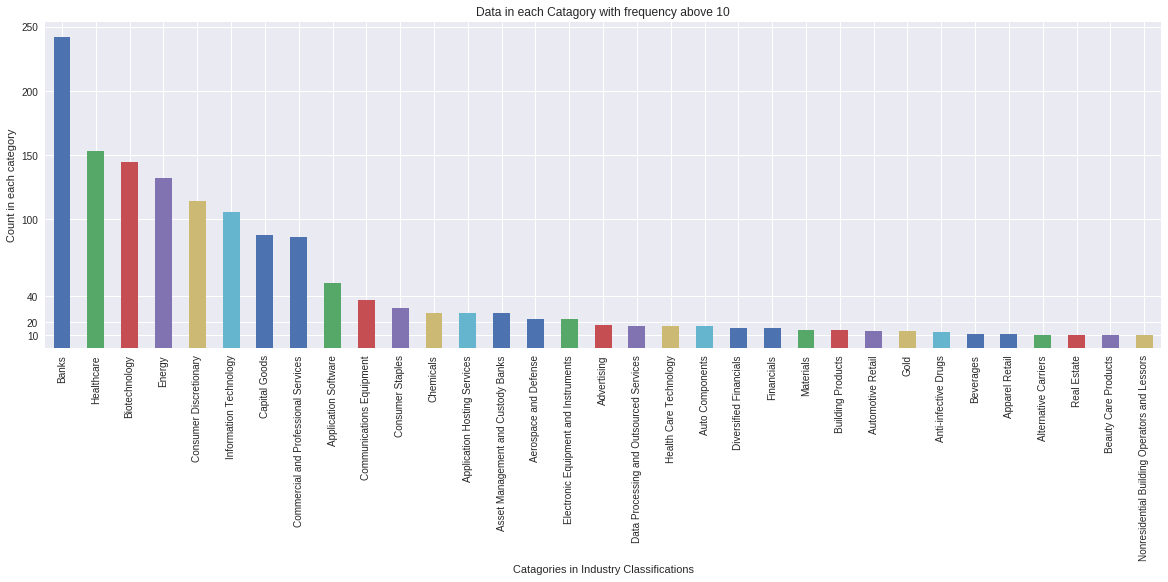

In [11]:
plt.figure(figsize=(20,6))
color_map= plt.cm.nipy_spectral
axx=plt.subplot()
axx.set_prop_cycle('color',[color_map(i) for i in np.linspace(0, 1,30)])
plt.yticks([10, 20, 40,100,150,200,250])

train_data['Industry Classifications'].value_counts()[0:33].plot(kind='bar')
plt.title('Data in each Catagory with frequency above 10')
plt.ylabel('Count in each category')
plt.xlabel('Catagories in Industry Classifications')
plt.show()

From the above graph, we can see that there are many categories which have very less frequency.

So, we need to** club the categories** in order to avoid the **biase in the predictive model**.

Henceforth,We will start by removing the categories, with **frequency less than 10**

In [12]:
train_data['kept']=train_data['Industry Classifications'].apply(lambda x : 'drop' if x in drop_1 else 'keep' )
bool_1=train_data['kept'] !='drop'
train_data=train_data.loc[bool_1,:]
train_data.drop(['kept'], axis=1, inplace=True)
train_data.shape

(1536, 9)

After removing, we are left with **1536 **rows

# Merging the relevant data


                               
                     **BEFORE NAMES**                                        ***AFTER NAMES***
1. 'Information Technology','Application Software','Data Processing and Outsourced Services'  -------> 'Information Technology'
2. 'Beverages','Beauty Care Products','Apparel Retail'--------------------------------------------------------------------------> 'Consumer Discretionary'
3. 'Alternative Carriers','Advertising','Application Hosting Services'-----------------------------------------------------> 'Commercial and Professional Services'
4. 'Communications Equipment'---------------------------------------------------------------------------------------------------------> 'Electronic Equipment and Instruments'
5. 'Health Care Technology','Anti-infective Drugs','Healthcare'------------------------------------------------------------> 'Biotechnology'
6. 'Building Products','Chemicals'-------------------------------------------------------------------------------------------------------->  ''Capital Goods'
7. 'Automotive Retail','Auto Components'-------------------------------------------------------------------------------------------->  'Automotive'
8. 'Nonresidential Building Operators and Lessors' --------------------------------------------------------------------------->  'Real Estate'
9. 'Gold' ---------------------------------------------------------------------------------------------------------------------------------------------->  'Materials'

In [0]:
k= ['Information Technology','Application Software','Data Processing and Outsourced Services']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x :'Information Technology'  if x in k else x)

In [0]:
k= ['Beverages','Beauty Care Products','Apparel Retail']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x :'Consumer Discretionary'  if x in k else x)

In [0]:
k= ['Alternative Carriers','Advertising','Application Hosting Services']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x :'Commercial and Professional Services'  if x in k else x)

In [0]:
k= ['Communications Equipment']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x :'Electronic Equipment and Instruments'  if x in k else x)

In [0]:
k= ['Health Care Technology','Anti-infective Drugs','Healthcare']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x :'Biotechnology'  if x in k else x)

In [0]:
k= ['Banks','Diversified Financials','Asset Management and Custody Banks']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x : 'Financials'  if x in k else x)

In [0]:
k= ['Building Products','Chemicals']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x : 'Capital Goods'  if x in k else x)

In [0]:
k= ['Automotive Retail','Auto Components']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x : 'Automotive'  if x in k else x)

In [0]:
k= ['Nonresidential Building Operators and Lessors']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x : 'Real Estate'  if x in k else x)

In [0]:
k= ['Gold']
train_data['Industry Classifications'] = train_data['Industry Classifications'].apply(lambda x : 'Materials'  if x in k else x)

# Viewing the Updated Industry Classification Distribution.



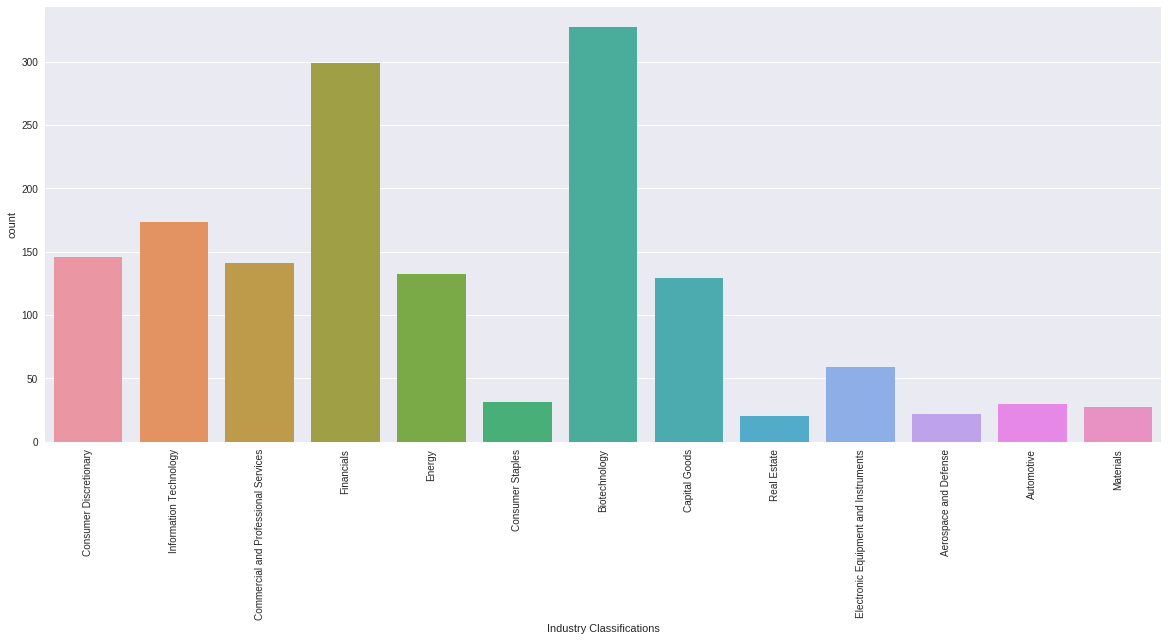

In [23]:
plt.figure(figsize=(20,8))
axx=plt.subplot(1,1,1)
color_map= plt.cm.nipy_spectral
axx.set_prop_cycle('color', [color_map(i) for i in np.linspace(0,1,2)])
sns.countplot(x= 'Industry Classifications', data=train_data)
plt.xticks(rotation=90)
plt.show()


As we can see,there are only **13 classifications** now. On which model can be made easily.




Hence, we will check, whether there is a relationship between "**Business Description" length and "Industry Classifications.**


Firstly we will see the** Box plot of Business_Description_length across various Industry Classification.** 


# Box plot of Business_Description_length across various Industry Classification.

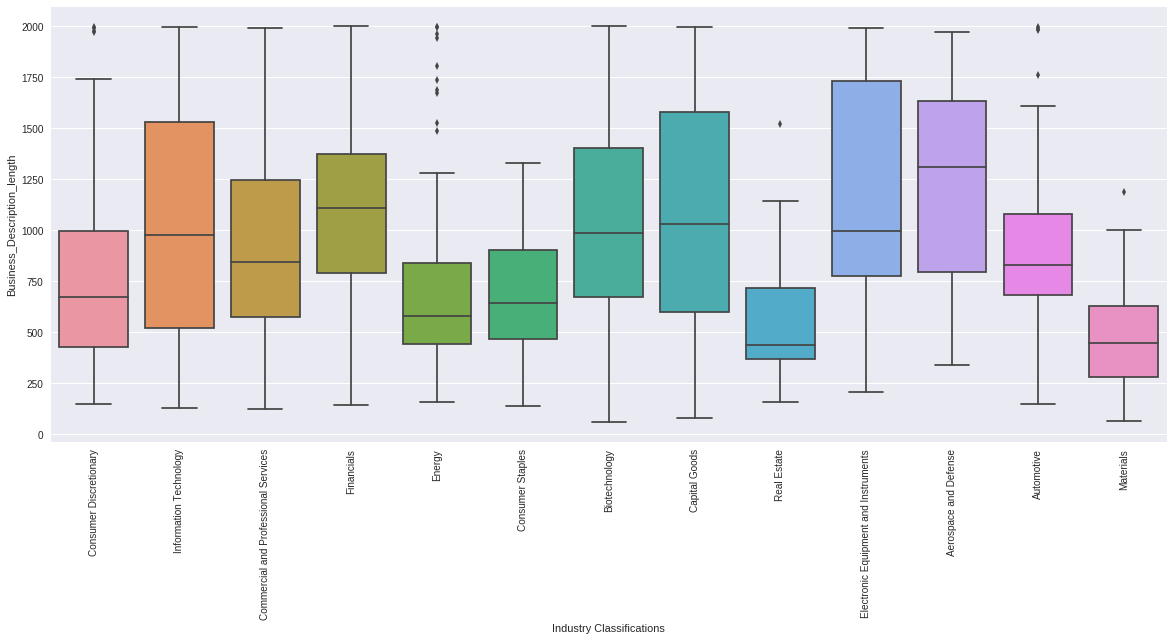

In [24]:
train_data['Business_Description_length']=train_data['Business Description'].apply(len)
plt.figure(figsize=(20,8))
sns.boxplot(x='Industry Classifications', y='Business_Description_length', data= train_data)
plt.xticks(rotation=90)
plt.show()

From the above graph,it is inferred that **Automotive, Energy, Materials and Consumer Staples have a shorter Business Description length as compared to others.**



# Calculating the **Mean Length**.

Text(0.5, 1.0, 'Mean Business Description length vs Industry Classification')

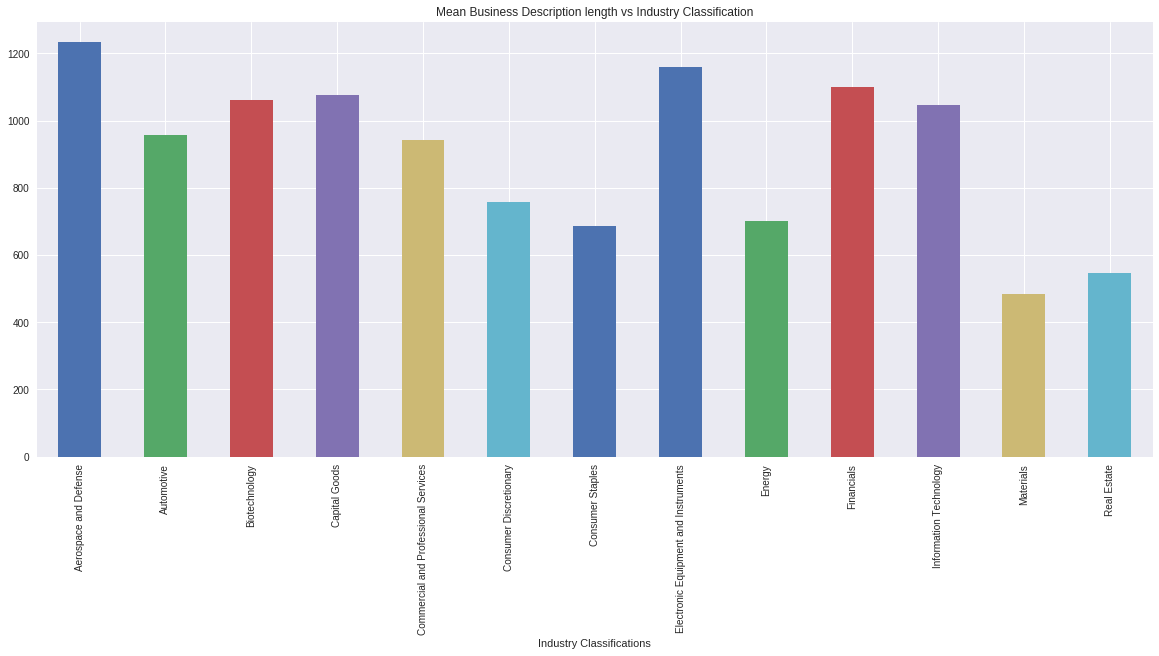

In [25]:
plt.figure(figsize=(20,8))
train_data.groupby('Industry Classifications')['Business_Description_length'].mean().plot.bar()
train_data.drop(['Business_Description_length'],axis=1, inplace= True)
plt.title("Mean Business Description length vs Industry Classification")

From the above graph, we **cannot **conclude any relation **between Business_Description_length and Industry Classifications**

# Joining Train and Test Data for data preprocessing.


In [0]:
both_df= pd.concat([train_data, test_data], ignore_index= True)

# **Data cleaning**


*   Firslty we will remove all punctuations and numeric values from the combined dataset
*   Then we will tokenize the data, so that stop words can be removed form it.
*   After that we will convert the data into lower case and then we remove the stop words from it.





In [0]:
nltk_words = list(stopwords.words('english')) 
both_df['Business Description']= both_df['Business Description'].apply(lambda x: word_tokenize(re.sub('[^A-Za-z ]+','',x)))
both_df['Business Description']= both_df['Business Description'].apply(lambda x: [i.lower() for i in x if i.lower()  not in nltk_words])

# Part of Speech


Now we will create a **function** to find the **Part of speech.**

In [0]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN, 
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# **Lemmatization** :

To merge the words which are having the same meaning.

In [0]:
lematize= WordNetLemmatizer()

both_df['Business Description']=both_df['Business Description'].apply(lambda x : [lematize.lemmatize(i, get_wordnet_pos(i)) for i in x])

# **ReJoining the Data**

Now we will **join the tokenized data**, so that we can use it in Counter vectorization.

In [0]:
both_df['Business Description']=both_df['Business Description'].apply(lambda x : ' '.join(str(i) for i in x))

# **Re-Splitting the test and train data **
**Re-spliting **the Data into train and test

In [0]:
train_data=both_df[both_df['identity']== 'train']
test_data=both_df[both_df['identity']== 'test']

# **Count Vectorization and Naive Bayes**

Now, we will count vectorize the data and create a naive bayes classification model that will be used for the predction of the Industry Class.

In [0]:
Count_V= CountVectorizer()

In [33]:
x = Count_V.fit_transform(train_data['Business Description'])
y=train_data['Industry Classifications']
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# **Model Accuracy**

Checking for the Accuracy of the Model.

In [34]:
accuracy_score(y_test, nb.predict(x_test))

0.7467532467532467

Inorder to do the **Stratified sampling** we will use **K-Fold cross validation** with count vectorised data

In [35]:
nb = MultinomialNB()
CVV_results= cross_val_score(nb, x, y, cv= 10 , scoring='accuracy')
CVV_results.mean()

0.7149551074493721

So, we are getting the accuracy of **71.4 **percent

# **TFIDF and Naive Bayes**

Now we use **T**erm **F**requency and **I**nverse **D**ocument **F**requency to predict the Class

In [36]:
tf_id= TfidfVectorizer()
x_1 = tf_id.fit_transform(train_data['Business Description'])
y_1=train_data['Industry Classifications']
x_train, x_test,y_train, y_test=train_test_split(x_1,y_1, test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
nb_1 = MultinomialNB()
nb_1.fit(x_train, y_train)
accuracy_score(y_test, nb_1.predict(x_test))

0.5746753246753247

Inorder to do the** Stratified sampling** we will use **K-Fold cross validation with TFIDF data**

In [37]:
nb_1 = MultinomialNB()
CVV_results= cross_val_score(nb_1, x_1, y_1, cv= 10 , scoring='accuracy')
CVV_results.mean()

0.5915662287006768

# **Final Output prediction**

As we can see,we are getting less accuracy in TFIDF the Count Vectorizer. So we will predict our test data with Count vectorizer.

In [0]:
x_output = Count_V.transform(test_data['Business Description'])
nb = MultinomialNB()
nb.fit(x, y)
y_output=nb.predict(x_output)
test_data.drop(['Industry Classifications','identity'], inplace=True, axis=1)
test_data.reset_index(inplace=True, drop=True)
test_data['Industry Classifications']=list(y_output)

In [0]:
from google.colab import files
test_data.to_csv('test_data.csv')
files.download("test_data.csv")

In [0]:
import os
